 # Decision Tree  :  Classification & Regressor

In [4]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,plot_tree

from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv("../DataSets/iris.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Feature & Label Seperation

In [25]:
x = data.drop("species",axis=1)
y = data["species"]

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)


In [7]:
##2. Split data to train test

In [26]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

## 3.  Model prediction of set data set

In [44]:
clf = DecisionTreeClassifier()

clf.fit(x_train , y_train )

y_preds = clf.predict(x_test)
y_preds
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
import pandas as pd

sepal_len = float(input("sepal_len: "))
sepal_width = float(input("sepal_width: "))
petal_len = float(input("petal_len: "))
petal_width = float(input("petal_width: "))

input_test = pd.DataFrame({"sepal_length": [sepal_len],
                           "sepal_width": [sepal_width],
                           "petal_length": [petal_len],
                           "petal_width": [petal_width]})

print(input_test)
y_input_predicted = clf.predict(input_test)
print("The flower is = ",y_input_predicted)

sepal_len: 5
sepal_width: 3.6
petal_len: 1.4
petal_width: 0.2
   sepal_length  sepal_width  petal_length  petal_width
0           5.0          3.6           1.4          0.2
The flower is =  ['setosa']


In [54]:
#  accuracy 

accuracy = accuracy_score(y_test,y_preds)
print(accuracy)


print(clf.score(x_test,y_test))

1.0
1.0


## 4-Plotting the tree at large

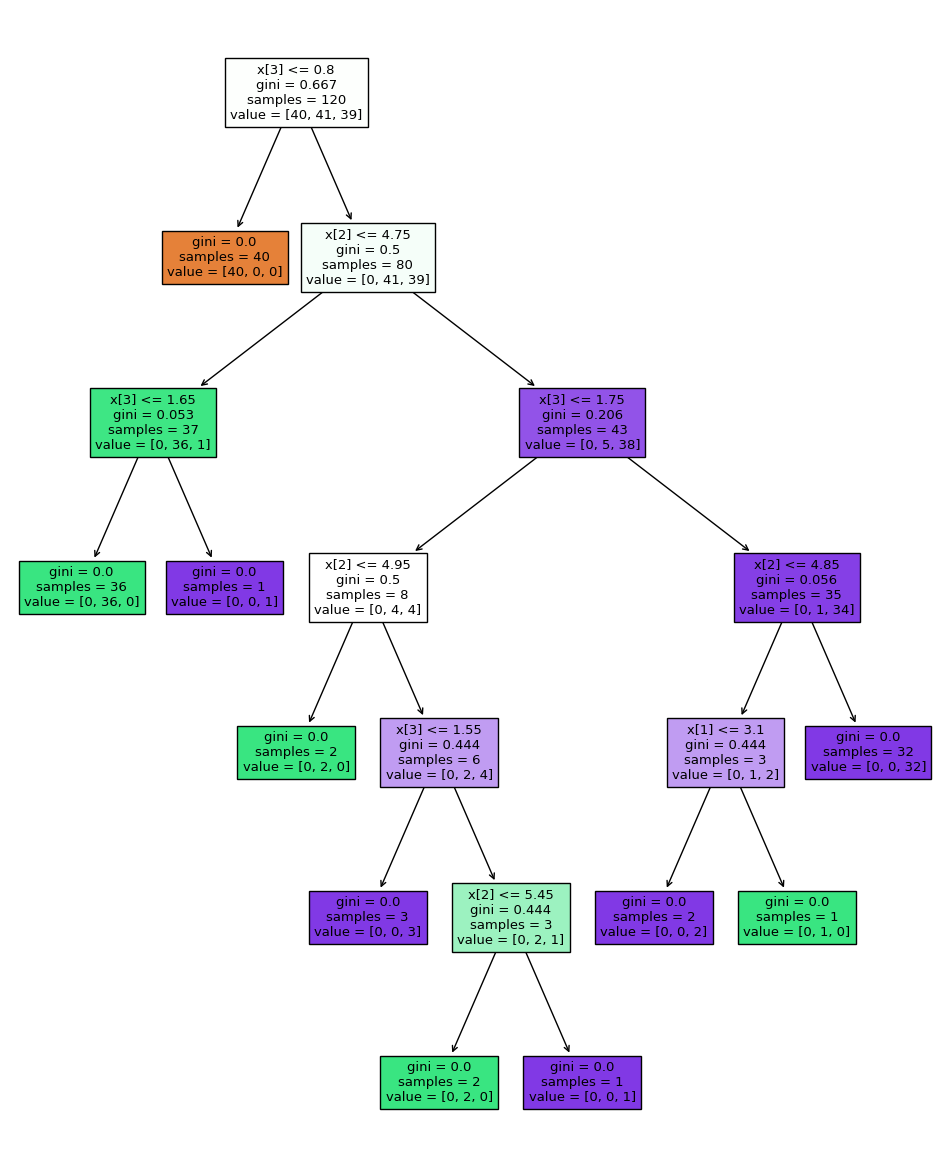

In [19]:
plt.figure(figsize=(12,15))
plot_tree(clf ,filled=True );


## 5-Identify outliers using a box plot

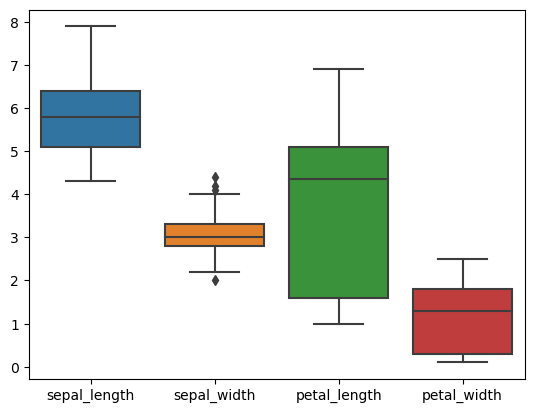

In [12]:
sns.boxplot(data=data);

## sepal width has some outliers

## 6-Calculate the Entropy

In [21]:
total = len(y)
class_counts = y.value_counts()
print(class_counts)

entropy = 0.0
for i in class_counts:
    print(i)
    probability = i / total
    entropy -= probability * math.log2(probability)

print('Entropy:', entropy)


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
50
50
50
Entropy: 1.584962500721156


## 7- Calculate the gini index

In [14]:
import numpy as np

def gini_index(labels):
    classes, count = np.unique(labels, return_counts=True)

    prob = count / len(labels)
    gini = 1 - np.sum(prob ** 2)
    return gini



gini = gini_index(y)
print("Gini Index:", gini)


Gini Index: 0.6666666666666667
